<a href="https://colab.research.google.com/github/maximo/crypto-analysis/blob/main/Messari_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

crypto = "eth"
start = "start=2020-12-01"
end = "&end=2021-01-01"
columns = "&columns=timestamp,close,volume"
interval = "&interval=1d"
url = f"https://data.messari.io/api/v1/assets/{crypto}/metrics/price/time-series?{start}{end}{interval}&format=csv"

pd.set_option("display.max_columns", None)
df = pd.read_csv(url)

# format timestamp to YYYY-MM-DD
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d')

In [ ]:
# display number of rows and columns in the dataset
df.shape

(32, 6)

In [ ]:
#metrics on the dataset
df.describe()

,open,high,low,close,volume
count,32.000000,32.000000,32.000000,32.000000,3.200000e+01
mean,622.291812,642.860729,600.390544,625.805383,2.084563e+09
std,54.687381,57.754525,54.152917,57.964246,1.022157e+09
min,544.906332,560.765260,530.048223,544.497093,9.343508e+08
25%,586.378554,597.464899,563.258441,586.269982,1.408341e+09
50%,610.333540,635.382702,584.021714,609.977027,1.858415e+09
75%,639.373350,666.243237,624.040297,645.718979,2.258266e+09
max,752.356509,758.309079,721.463760,752.412845,4.715926e+09


In [ ]:
df.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume       float64
dtype: object

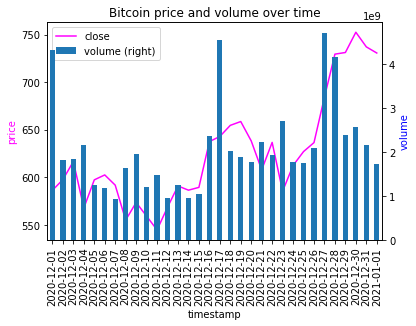

In [3]:
import matplotlib.pyplot as plt

ax = df.plot(x="timestamp", y="close", color="magenta")
ax.set_ylabel("price", color="magenta")
ax2 = df.plot(x="timestamp", y="volume", kind="bar", secondary_y=True, ax=ax)
ax2.set_ylabel("volume", color="blue")

plt.title("Bitcoin price and volume over time")
plt.show()

In [10]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install ta-Lib

--2021-03-29 02:59:01--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-03-29 02:59:01--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-03-29 02:59:02--  https://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving pilotfiber

In [19]:
rsi_df = df[['timestamp']]
rsi_df.head()

,timestamp
0,2020-12-01
1,2020-12-02
2,2020-12-03
3,2020-12-04
4,2020-12-05


In [20]:
import talib

rsi_df['RSI(14)'] = talib.RSI(df['close'].values, timeperiod=14)
rsi_df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,RSI(14)
27,2020-12-28,66.654357
28,2020-12-29,66.834294
29,2020-12-30,69.051476
30,2020-12-31,65.642485
31,2021-01-01,64.203847


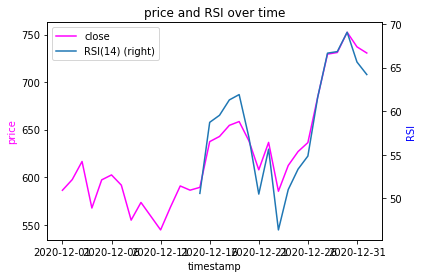

In [21]:

ax = df.plot(x="timestamp", y="close", color="magenta")
ax.set_ylabel("price", color="magenta")
ax2 = rsi_df.plot(x="timestamp", y="RSI(14)", secondary_y=True, ax=ax)
ax2.set_ylabel("RSI", color="blue")

plt.title("price and RSI over time")
plt.show()